In [24]:
import os
import pandas as pd
from dotenv import load_dotenv
import nltk as nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

%matplotlib inline

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\mikev\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [25]:
load_dotenv()
api_key = os.getenv("news_api")
print(api_key)

6328236de8a042eba8425dcef7ff96dc


In [26]:
from newsapi import NewsApiClient
newsapi = NewsApiClient(api_key=api_key)

In [27]:
btc_news = newsapi.get_everything(q = "bitcoin", language = "en")
print(f"Total Results: {btc_news['totalResults']}")

eth_news = newsapi.get_everything(q = "ethereum", language = "en")
print(f"Total Results: {eth_news['totalResults']}")

doge_news = newsapi.get_everything(q = "dogecoin", language = "en")
print(f"Total Results: {doge_news['totalResults']}")

car_news = newsapi.get_everything(q = "cardano", language = "en")
print(f"Total Results: {car_news['totalResults']}")

pol_news = newsapi.get_everything(q = "polkadot", language = "en")
print(f"Total Results: {pol_news['totalResults']}")

link_news = newsapi.get_everything(q = "chainlink", language = "en")
print(f"Total Results: {link_news['totalResults']}")

Total Results: 9668
Total Results: 2456
Total Results: 1216
Total Results: 311
Total Results: 251
Total Results: 121


In [28]:
#Bitcoin
btc_sentiments = []

for article in btc_news["articles"]:
    try:
        text = article["content"]
        date = article["publishedAt"][:1]
        sentiment = analyzer.polarity_scores(text)
        compound = sentiment["compound"]
        pos = sentiment["pos"]
        neu = sentiment["neu"]
        neg = sentiment["neg"]
        
        btc_sentiments.append({
            "Compound": compound,
            "Positive": pos,
            "Negative": neg,
            "Neutral": neu,
            "text": text      
        })
        
    except AttributeError:
        pass
    

btc_df = pd.DataFrame(btc_sentiments)
btc_cols = ["Compound", "Negative", "Neutral", "Positive", "text"]
btc_df = btc_df[btc_cols]
btc_df.head()

,Compound,Negative,Neutral,Positive,text
0,0.8402,0.000,0.718,0.282,El Salvador's President Nayib Bukele has made ...
1,0.1280,0.000,0.957,0.043,El Salvador has become the first country in th...
2,0.6908,0.000,0.831,0.169,"It's all about clean energy, it seems. \r\nElo..."
3,-0.5719,0.184,0.705,0.111,Filed under:\r\nThe supply chain attack has re...
4,0.2732,0.000,0.940,0.060,image captionThe move means bitcoin will be ac...


In [29]:
#Ethereum
eth_sentiments = []

for article in eth_news["articles"]:
    try:
        text = article["content"]
        date = article["publishedAt"][:10]
        sentiment = analyzer.polarity_scores(text)
        compound = sentiment["compound"]
        pos = sentiment["pos"]
        neu = sentiment["neu"]
        neg = sentiment["neg"]
        
        eth_sentiments.append({
            "Compound": compound,
            "Positive": pos,
            "Negative": neg,
            "Neutral": neu,
            "text": text      
        })
        
    except AttributeError:
        pass
    
eth_df = pd.DataFrame(eth_sentiments)
eth_cols = ["Compound", "Negative", "Neutral", "Positive", "text"]
eth_df = eth_df[eth_cols]
eth_df.head()

,Compound,Negative,Neutral,Positive,text
0,0.0000,0.000,1.000,0.000,TL;DR: The Cryptocurrency with Ethereum and So...
1,-0.2960,0.061,0.939,0.000,It wasn't long ago that your average person ha...
2,-0.3400,0.066,0.934,0.000,This article was translated from our Spanish e...
3,0.3612,0.041,0.849,0.110,Bitcoin and Ethereum\r\nYuriko Nakao\r\nEther ...
4,0.7717,0.000,0.806,0.194,"Ether holders have ""staked"" more than $13 bill..."


In [30]:
#Cardano
car_sentiments = []

for article in car_news["articles"]:
    try:
        text = article["content"]
        date = article["publishedAt"][:10]
        sentiment = analyzer.polarity_scores(text)
        compound = sentiment["compound"]
        pos = sentiment["pos"]
        neu = sentiment["neu"]
        neg = sentiment["neg"]
        
        car_sentiments.append({
            "Compound": compound,
            "Positive": pos,
            "Negative": neg,
            "Neutral": neu,
            "text": text      
        })
        
    except AttributeError:
        pass
    
car_df = pd.DataFrame(car_sentiments)
car_cols = ["Compound", "Negative", "Neutral", "Positive", "text"]
car_df = car_df[car_cols]
car_df.head()

,Compound,Negative,Neutral,Positive,text
0,0.1027,0.061,0.866,0.073,Opinions expressed by Entrepreneur contributor...
1,0.1779,0.000,0.948,0.052,INA FASSBENDER/AFP via Getty Images\r\nInvesto...
2,0.3400,0.000,0.932,0.068,Marnie Griffiths/Getty\r\nThe mysterious dogec...
3,0.6361,0.000,0.848,0.152,The US is the country most prepared for widesp...
4,0.0772,0.075,0.841,0.084,This story originally appeared on MarketBeatWh...


In [31]:
#DogeCoin
doge_sentiments = []
for article in doge_news["articles"]:
    try:
        text = article["content"]
        date = article["publishedAt"][:10]
        sentiment = analyzer.polarity_scores(text)
        compound = sentiment["compound"]
        pos = sentiment["pos"]
        neu = sentiment["neu"]
        neg = sentiment["neg"]
        
        doge_sentiments.append({
            "Compound": compound,
            "Positive": pos,
            "Negative": neg,
            "Neutral": neu,
            "text": text      
        })
        
    except AttributeError:
        pass
    
doge_df = pd.DataFrame(doge_sentiments)
doge_cols = ["Compound", "Negative", "Neutral", "Positive", "text"]
doge_df = doge_df[doge_cols]
doge_df.head()


,Compound,Negative,Neutral,Positive,text
0,-0.6597,0.148,0.852,0.000,Illustration by Maria Chimishkyan\r\n\n \n\n T...
1,-0.3400,0.066,0.934,0.000,This article was translated from our Spanish e...
2,0.3400,0.000,0.932,0.068,Marnie Griffiths/Getty\r\nThe mysterious dogec...
3,0.0000,0.000,1.000,0.000,A tweet from Elon Musk caused the price of a n...
4,-0.3400,0.064,0.936,0.000,This article was translated from our Spanish e...


In [32]:
#Polkadot
pol_sentiments = []
for article in pol_news["articles"]:
    try:
        text = article["content"]
        date = article["publishedAt"][:10]
        sentiment = analyzer.polarity_scores(text)
        compound = sentiment["compound"]
        pos = sentiment["pos"]
        neu = sentiment["neu"]
        neg = sentiment["neg"]
        
        pol_sentiments.append({
            "Compound": compound,
            "Positive": pos,
            "Negative": neg,
            "Neutral": neu,
            "text": text      
        })
        
    except AttributeError:
        pass
    
pol_df = pd.DataFrame(doge_sentiments)
pol_cols = ["Compound", "Negative", "Neutral", "Positive", "text"]
pol_df = pol_df[pol_cols]
pol_df.head()


,Compound,Negative,Neutral,Positive,text
0,-0.6597,0.148,0.852,0.000,Illustration by Maria Chimishkyan\r\n\n \n\n T...
1,-0.3400,0.066,0.934,0.000,This article was translated from our Spanish e...
2,0.3400,0.000,0.932,0.068,Marnie Griffiths/Getty\r\nThe mysterious dogec...
3,0.0000,0.000,1.000,0.000,A tweet from Elon Musk caused the price of a n...
4,-0.3400,0.064,0.936,0.000,This article was translated from our Spanish e...


In [33]:
#ChainLink

link_sentiments = []
for article in doge_news["articles"]:
    try:
        text = article["content"]
        date = article["publishedAt"][:10]
        sentiment = analyzer.polarity_scores(text)
        compound = sentiment["compound"]
        pos = sentiment["pos"]
        neu = sentiment["neu"]
        neg = sentiment["neg"]
        
        link_sentiments.append({
            "Compound": compound,
            "Positive": pos,
            "Negative": neg,
            "Neutral": neu,
            "text": text      
        })
        
    except AttributeError:
        pass
    
link_df = pd.DataFrame(doge_sentiments)
link_cols = ["Compound", "Negative", "Neutral", "Positive", "text"]
link_df = link_df[link_cols]
link_df.head()


,Compound,Negative,Neutral,Positive,text
0,-0.6597,0.148,0.852,0.000,Illustration by Maria Chimishkyan\r\n\n \n\n T...
1,-0.3400,0.066,0.934,0.000,This article was translated from our Spanish e...
2,0.3400,0.000,0.932,0.068,Marnie Griffiths/Getty\r\nThe mysterious dogec...
3,0.0000,0.000,1.000,0.000,A tweet from Elon Musk caused the price of a n...
4,-0.3400,0.064,0.936,0.000,This article was translated from our Spanish e...


In [34]:
btc_df.describe()

,Compound,Negative,Neutral,Positive
count,20.000000,20.000000,20.000000,20.000000
mean,0.104660,0.036000,0.895400,0.068550
std,0.377301,0.053666,0.084808,0.069756
min,-0.612400,0.000000,0.705000,0.000000
25%,-0.050575,0.000000,0.840250,0.000000
50%,0.128000,0.000000,0.923500,0.060500
75%,0.289900,0.059000,0.955500,0.105500
max,0.840200,0.184000,1.000000,0.282000


In [35]:
eth_df.describe()

,Compound,Negative,Neutral,Positive
count,20.000000,20.000000,20.000000,20.000000
mean,0.063475,0.025150,0.934350,0.040500
std,0.356132,0.032347,0.053135,0.058708
min,-0.381800,0.000000,0.806000,0.000000
25%,-0.273200,0.000000,0.920000,0.000000
50%,0.000000,0.000000,0.936500,0.000000
75%,0.361200,0.060250,0.961000,0.074750
max,0.771700,0.080000,1.000000,0.194000


In [36]:
car_df.describe()


,Compound,Negative,Neutral,Positive
count,20.000000,20.000000,20.000000,20.000000
mean,0.312320,0.022550,0.882950,0.094500
std,0.349543,0.033516,0.067129,0.066562
min,-0.557400,0.000000,0.738000,0.000000
25%,0.057900,0.000000,0.842000,0.061750
50%,0.411700,0.000000,0.883000,0.085000
75%,0.575400,0.050250,0.920000,0.152500
max,0.753100,0.104000,1.000000,0.211000


In [37]:
doge_df.describe()

,Compound,Negative,Neutral,Positive
count,20.000000,20.000000,20.00000,20.000000
mean,0.073930,0.025250,0.93500,0.039750
std,0.389294,0.043655,0.05507,0.056921
min,-0.659700,0.000000,0.77600,0.000000
25%,-0.181000,0.000000,0.91725,0.000000
50%,0.000000,0.000000,0.93300,0.000000
75%,0.366350,0.049750,0.96625,0.070250
max,0.796400,0.148000,1.00000,0.224000


In [38]:
link_df.describe()

,Compound,Negative,Neutral,Positive
count,20.000000,20.000000,20.00000,20.000000
mean,0.073930,0.025250,0.93500,0.039750
std,0.389294,0.043655,0.05507,0.056921
min,-0.659700,0.000000,0.77600,0.000000
25%,-0.181000,0.000000,0.91725,0.000000
50%,0.000000,0.000000,0.93300,0.000000
75%,0.366350,0.049750,0.96625,0.070250
max,0.796400,0.148000,1.00000,0.224000


In [39]:
pol_df.describe()

,Compound,Negative,Neutral,Positive
count,20.000000,20.000000,20.00000,20.000000
mean,0.073930,0.025250,0.93500,0.039750
std,0.389294,0.043655,0.05507,0.056921
min,-0.659700,0.000000,0.77600,0.000000
25%,-0.181000,0.000000,0.91725,0.000000
50%,0.000000,0.000000,0.93300,0.000000
75%,0.366350,0.049750,0.96625,0.070250
max,0.796400,0.148000,1.00000,0.224000


In [40]:
#Tokenizing
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
from string import punctuation
import re

from collections import Counter
from nltk import ngrams

In [41]:
wnl = WordNetLemmatizer()
stop = stopwords.words('english')
stop.append("u")
stop.append("it'")
stop.append("'s")
stop.append("n't")
stop.append("_")
stop.append("\`")
stop.append("``")
stop.append("''''")
stop = set(stop)

In [42]:
def tokenizer(text):
    """Tokenizes text."""
    
    # Create a list of the words
    words = word_tokenize(text)
    # Convert the words to lowercase
    words = list(filter(lambda w: w.lower(), words))
    # Remove the punctuation
    words = list(filter(lambda t: t not in punctuation, words))
    # Remove the stop words
    words = list(filter(lambda t: t.lower() not in stop, words))
    # Lemmatize Words into root words
    tokens = [wnl.lemmatize(word) for word in words]
    
    return tokens    

In [43]:
btc_df['tokens'] = btc_df['text'].apply(tokenizer)
btc_df.head()

,Compound,Negative,Neutral,Positive,text,tokens
0,0.8402,0.000,0.718,0.282,El Salvador's President Nayib Bukele has made ...,"[El, Salvador, President, Nayib, Bukele, made,..."
1,0.1280,0.000,0.957,0.043,El Salvador has become the first country in th...,"[El, Salvador, become, first, country, world, ..."
2,0.6908,0.000,0.831,0.169,"It's all about clean energy, it seems. \r\nElo...","[clean, energy, seems, Elon, Musk, Tesla, caus..."
3,-0.5719,0.184,0.705,0.111,Filed under:\r\nThe supply chain attack has re...,"[Filed, supply, chain, attack, reached, thousa..."
4,0.2732,0.000,0.940,0.060,image captionThe move means bitcoin will be ac...,"[image, captionThe, move, mean, bitcoin, accep..."


In [44]:
eth_df['tokens'] = eth_df['text'].apply(tokenizer)
eth_df.head()

,Compound,Negative,Neutral,Positive,text,tokens
0,0.0000,0.000,1.000,0.000,TL;DR: The Cryptocurrency with Ethereum and So...,"[TL, DR, Cryptocurrency, Ethereum, Solidity, B..."
1,-0.2960,0.061,0.939,0.000,It wasn't long ago that your average person ha...,"[long, ago, average, person, clue, NFT, Nowada..."
2,-0.3400,0.066,0.934,0.000,This article was translated from our Spanish e...,"[article, translated, Spanish, edition, using,..."
3,0.3612,0.041,0.849,0.110,Bitcoin and Ethereum\r\nYuriko Nakao\r\nEther ...,"[Bitcoin, Ethereum, Yuriko, Nakao, Ether, over..."
4,0.7717,0.000,0.806,0.194,"Ether holders have ""staked"" more than $13 bill...","[Ether, holder, staked, '', 13, billion, worth..."


In [45]:
car_df['tokens'] = car_df['text'].apply(tokenizer)
car_df.head()

,Compound,Negative,Neutral,Positive,text,tokens
0,0.1027,0.061,0.866,0.073,Opinions expressed by Entrepreneur contributor...,"[Opinions, expressed, Entrepreneur, contributo..."
1,0.1779,0.000,0.948,0.052,INA FASSBENDER/AFP via Getty Images\r\nInvesto...,"[INA, FASSBENDER/AFP, via, Getty, Images, Inve..."
2,0.3400,0.000,0.932,0.068,Marnie Griffiths/Getty\r\nThe mysterious dogec...,"[Marnie, Griffiths/Getty, mysterious, dogecoin..."
3,0.6361,0.000,0.848,0.152,The US is the country most prepared for widesp...,"[US, country, prepared, widespread, use, crypt..."
4,0.0772,0.075,0.841,0.084,This story originally appeared on MarketBeatWh...,"[story, originally, appeared, MarketBeatWhen, ..."


In [46]:
doge_df['tokens'] = doge_df['text'].apply(tokenizer)
doge_df.head()

,Compound,Negative,Neutral,Positive,text,tokens
0,-0.6597,0.148,0.852,0.000,Illustration by Maria Chimishkyan\r\n\n \n\n T...,"[Illustration, Maria, Chimishkyan, lot, way, t..."
1,-0.3400,0.066,0.934,0.000,This article was translated from our Spanish e...,"[article, translated, Spanish, edition, using,..."
2,0.3400,0.000,0.932,0.068,Marnie Griffiths/Getty\r\nThe mysterious dogec...,"[Marnie, Griffiths/Getty, mysterious, dogecoin..."
3,0.0000,0.000,1.000,0.000,A tweet from Elon Musk caused the price of a n...,"[tweet, Elon, Musk, caused, price, new, meme, ..."
4,-0.3400,0.064,0.936,0.000,This article was translated from our Spanish e...,"[article, translated, Spanish, edition, using,..."


In [47]:
link_df['tokens'] = link_df['text'].apply(tokenizer)
link_df.head()

,Compound,Negative,Neutral,Positive,text,tokens
0,-0.6597,0.148,0.852,0.000,Illustration by Maria Chimishkyan\r\n\n \n\n T...,"[Illustration, Maria, Chimishkyan, lot, way, t..."
1,-0.3400,0.066,0.934,0.000,This article was translated from our Spanish e...,"[article, translated, Spanish, edition, using,..."
2,0.3400,0.000,0.932,0.068,Marnie Griffiths/Getty\r\nThe mysterious dogec...,"[Marnie, Griffiths/Getty, mysterious, dogecoin..."
3,0.0000,0.000,1.000,0.000,A tweet from Elon Musk caused the price of a n...,"[tweet, Elon, Musk, caused, price, new, meme, ..."
4,-0.3400,0.064,0.936,0.000,This article was translated from our Spanish e...,"[article, translated, Spanish, edition, using,..."


In [48]:
pol_df['tokens'] = pol_df['text'].apply(tokenizer)
pol_df.head()

,Compound,Negative,Neutral,Positive,text,tokens
0,-0.6597,0.148,0.852,0.000,Illustration by Maria Chimishkyan\r\n\n \n\n T...,"[Illustration, Maria, Chimishkyan, lot, way, t..."
1,-0.3400,0.066,0.934,0.000,This article was translated from our Spanish e...,"[article, translated, Spanish, edition, using,..."
2,0.3400,0.000,0.932,0.068,Marnie Griffiths/Getty\r\nThe mysterious dogec...,"[Marnie, Griffiths/Getty, mysterious, dogecoin..."
3,0.0000,0.000,1.000,0.000,A tweet from Elon Musk caused the price of a n...,"[tweet, Elon, Musk, caused, price, new, meme, ..."
4,-0.3400,0.064,0.936,0.000,This article was translated from our Spanish e...,"[article, translated, Spanish, edition, using,..."


In [49]:
btc_words = tokenizer(''.join(str(btc_df['text'].tolist())))
btc_counts = Counter(ngrams(btc_words, n=2))
print(dict(btc_counts))

{('El', 'Salvador'): 5, ('Salvador', 'President'): 1, ('President', 'Nayib'): 2, ('Nayib', 'Bukele'): 2, ('Bukele', 'made'): 1, ('made', 'good'): 1, ('good', 'promise'): 1, ('promise', 'adopt'): 1, ('adopt', 'Bitcoin'): 1, ('Bitcoin', 'legal'): 1, ('legal', 'tender'): 5, ('tender', 'Officials'): 1, ('Officials', 'Central'): 1, ('Central', 'American'): 3, ('American', 'country'): 1, ('country', 'congress'): 1, ('congress', 'voted'): 1, ('voted', 'accept'): 1, ('accept', 'cryptocurrency'): 1, ('cryptocurrency', 'majori…'): 1, ('majori…', '+1414'): 1, ('+1414', 'char'): 1, ('char', "''"): 7, ("''", "'El"): 1, ("'El", 'Salvador'): 1, ('Salvador', 'become'): 2, ('become', 'first'): 2, ('first', 'country'): 2, ('country', 'world'): 2, ('world', 'recognize'): 1, ('recognize', 'cryptocurrency'): 1, ('cryptocurrency', 'bitcoin'): 1, ('bitcoin', 'legal'): 5, ('legal', 'currency'): 1, ('currency', 'according'): 1, ('according', 'President'): 1, ('Bukele', 'tweet'): 1, ('tweet', 'Wednesday'): 1, (

In [50]:
eth_words = tokenizer(''.join(str(eth_df['text'].tolist())))
eth_counts = Counter(ngrams(eth_words, n=2))
print(dict(eth_counts))

{("'TL", 'DR'): 1, ('DR', 'Cryptocurrency'): 1, ('Cryptocurrency', 'Ethereum'): 2, ('Ethereum', 'Solidity'): 2, ('Solidity', 'Blockchain'): 2, ('Blockchain', 'Developer'): 2, ('Developer', 'Bundle'): 2, ('Bundle', 'sale'): 1, ('sale', '£21.25'): 1, ('£21.25', 'June'): 1, ('June', '17'): 1, ('17', 'saving'): 1, ('saving', '97'): 1, ('97', 'list'): 1, ('list', 'price.\\r\\nIs'): 1, ('price.\\r\\nIs', 'everyone'): 1, ('everyone', 'know'): 1, ('know', 'investing'): 1, ('investing', 'cryptocurrency'): 1, ('cryptocurrency', '…'): 4, ('…', '+949'): 1, ('+949', 'char'): 1, ('char', 'long'): 1, ('long', 'ago'): 1, ('ago', 'average'): 1, ('average', 'person'): 1, ('person', 'clue'): 1, ('clue', 'NFT'): 1, ('NFT', 'Nowadays'): 1, ('Nowadays', "'re"): 1, ("'re", 'making'): 1, ('making', 'headline'): 1, ('headline', 'selling'): 1, ('selling', 'hundred'): 1, ('hundred', 'thousand'): 1, ('thousand', 'buck'): 1, ('buck', 'Predictably'): 1, ('Predictably', 'folk'): 1, ('folk', 'learning'): 1, ('learnin

In [51]:
car_words = tokenizer(''.join(str(car_df['text'].tolist())))
car_counts = Counter(ngrams(car_words, n=2))
print(dict(car_counts))

{("'Opinions", 'expressed'): 2, ('expressed', 'Entrepreneur'): 2, ('Entrepreneur', 'contributor'): 2, ('contributor', 'own.\\r\\nOn'): 1, ('own.\\r\\nOn', 'May'): 1, ('May', '12'): 1, ('12', '2021'): 1, ('2021', 'Elon'): 1, ('Elon', 'Musk'): 3, ('Musk', 'announced'): 1, ('announced', 'Tesla'): 1, ('Tesla', 'would'): 1, ('would', 'longer'): 1, ('longer', 'accept'): 1, ('accept', 'Bitcoin'): 1, ('Bitcoin', 'form'): 1, ('form', 'payment'): 1, ('payment', 'of\\xa0its'): 1, ('of\\xa0its', 'environmental'): 1, ('environmental', 'impact…'): 1, ('impact…', '+5077'): 1, ('+5077', 'char'): 1, ('char', "'INA"): 1, ("'INA", 'FASSBENDER/AFP'): 1, ('FASSBENDER/AFP', 'via'): 1, ('via', 'Getty'): 1, ('Getty', 'Images\\r\\nInvestors'): 1, ('Images\\r\\nInvestors', 'pulled'): 1, ('pulled', 'money'): 1, ('money', 'digital'): 1, ('digital', 'asset'): 1, ('asset', 'third'): 1, ('third', 'week'): 1, ('week', 'running'): 1, ('running', 'making'): 1, ('making', 'longest'): 1, ('longest', 'series'): 1, ('serie

In [52]:
pol_words = tokenizer(''.join(str(pol_df['text'].tolist())))
pol_counts = Counter(ngrams(pol_words, n=2))
print(dict(pol_counts))

{("'Illustration", 'Maria'): 1, ('Maria', 'Chimishkyan\\r\\n\\n'): 1, ('Chimishkyan\\r\\n\\n', '\\n\\n'): 1, ('\\n\\n', 'lot'): 1, ('lot', 'way'): 1, ('way', 'thing'): 1, ('thing', 'go'): 1, ('go', 'wrong'): 1, ('wrong', 'online'): 1, ('online', 'Password'): 1, ('Password', 'database'): 1, ('database', 'get'): 1, ('get', 'breached'): 1, ('breached', 'personal'): 1, ('personal', 'data'): 1, ('data', 'get'): 1, ('get', 'leaked'): 1, ('leaked', 'tracker'): 1, ('tracker', 'pop'): 1, ('pop', 'least'): 1, ('least', 'expect'): 1, ('expect', 'them.…'): 1, ('them.…', '+680'): 1, ('+680', 'char'): 1, ('char', "'This"): 2, ("'This", 'article'): 1, ('article', 'translated'): 2, ('translated', 'Spanish'): 2, ('Spanish', 'edition'): 2, ('edition', 'using'): 2, ('using', 'AI'): 2, ('AI', 'technology'): 2, ('technology', 'Errors'): 2, ('Errors', 'may'): 2, ('may', 'exist'): 2, ('exist', 'due'): 2, ('due', 'process.\\r\\nLast'): 1, ('process.\\r\\nLast', 'May'): 1, ('May', 'VitaliK'): 1, ('VitaliK', 'B

In [53]:
link_words = tokenizer(''.join(str(link_df['text'].tolist())))
link_counts = Counter(ngrams(link_words, n=2))
print(dict(link_counts))

{("'Illustration", 'Maria'): 1, ('Maria', 'Chimishkyan\\r\\n\\n'): 1, ('Chimishkyan\\r\\n\\n', '\\n\\n'): 1, ('\\n\\n', 'lot'): 1, ('lot', 'way'): 1, ('way', 'thing'): 1, ('thing', 'go'): 1, ('go', 'wrong'): 1, ('wrong', 'online'): 1, ('online', 'Password'): 1, ('Password', 'database'): 1, ('database', 'get'): 1, ('get', 'breached'): 1, ('breached', 'personal'): 1, ('personal', 'data'): 1, ('data', 'get'): 1, ('get', 'leaked'): 1, ('leaked', 'tracker'): 1, ('tracker', 'pop'): 1, ('pop', 'least'): 1, ('least', 'expect'): 1, ('expect', 'them.…'): 1, ('them.…', '+680'): 1, ('+680', 'char'): 1, ('char', "'This"): 2, ("'This", 'article'): 1, ('article', 'translated'): 2, ('translated', 'Spanish'): 2, ('Spanish', 'edition'): 2, ('edition', 'using'): 2, ('using', 'AI'): 2, ('AI', 'technology'): 2, ('technology', 'Errors'): 2, ('Errors', 'may'): 2, ('may', 'exist'): 2, ('exist', 'due'): 2, ('due', 'process.\\r\\nLast'): 1, ('process.\\r\\nLast', 'May'): 1, ('May', 'VitaliK'): 1, ('VitaliK', 'B

In [54]:
doge_words = tokenizer(''.join(str(doge_df['text'].tolist())))
doge_counts = Counter(ngrams(doge_words, n=2))
print(dict(doge_counts))

{("'Illustration", 'Maria'): 1, ('Maria', 'Chimishkyan\\r\\n\\n'): 1, ('Chimishkyan\\r\\n\\n', '\\n\\n'): 1, ('\\n\\n', 'lot'): 1, ('lot', 'way'): 1, ('way', 'thing'): 1, ('thing', 'go'): 1, ('go', 'wrong'): 1, ('wrong', 'online'): 1, ('online', 'Password'): 1, ('Password', 'database'): 1, ('database', 'get'): 1, ('get', 'breached'): 1, ('breached', 'personal'): 1, ('personal', 'data'): 1, ('data', 'get'): 1, ('get', 'leaked'): 1, ('leaked', 'tracker'): 1, ('tracker', 'pop'): 1, ('pop', 'least'): 1, ('least', 'expect'): 1, ('expect', 'them.…'): 1, ('them.…', '+680'): 1, ('+680', 'char'): 1, ('char', "'This"): 2, ("'This", 'article'): 1, ('article', 'translated'): 2, ('translated', 'Spanish'): 2, ('Spanish', 'edition'): 2, ('edition', 'using'): 2, ('using', 'AI'): 2, ('AI', 'technology'): 2, ('technology', 'Errors'): 2, ('Errors', 'may'): 2, ('may', 'exist'): 2, ('exist', 'due'): 2, ('due', 'process.\\r\\nLast'): 1, ('process.\\r\\nLast', 'May'): 1, ('May', 'VitaliK'): 1, ('VitaliK', 'B

In [55]:
##Word Cloud Images

from wordcloud import WordCloud
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = [20.0, 10.0]

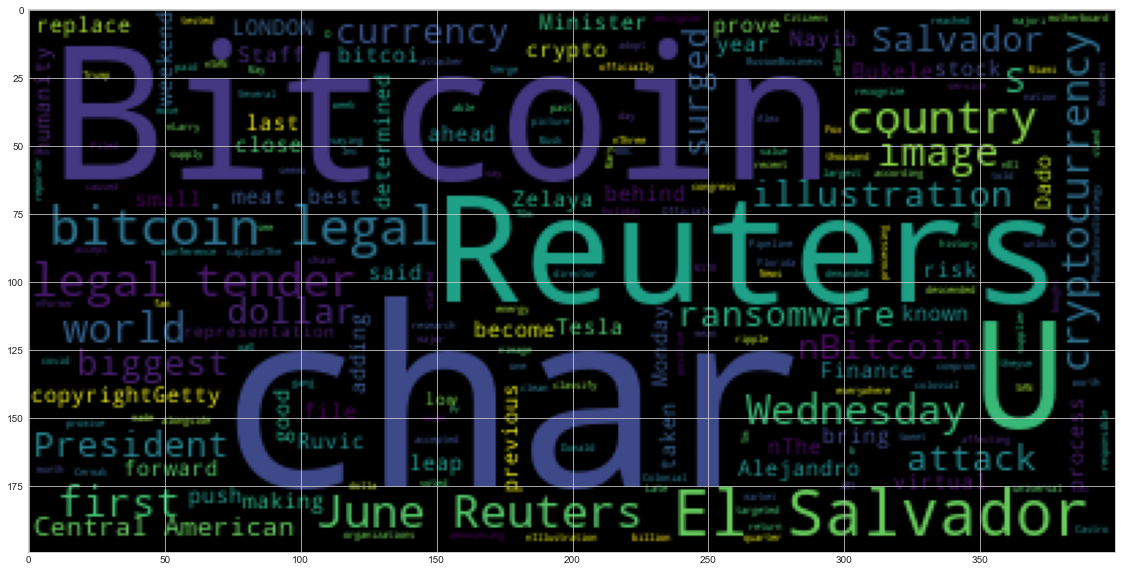

In [56]:
btc_cloud = " ".join(btc_words)
wc = WordCloud().generate(btc_cloud)
plt.imshow(wc)

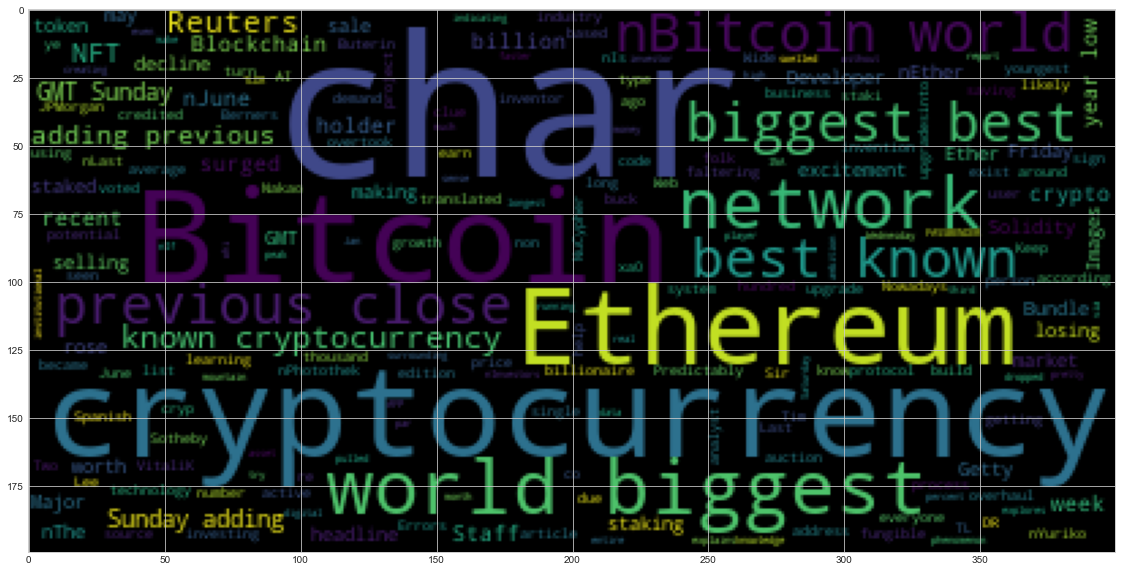

In [57]:
eth_cloud = " ".join(eth_words)
wc = WordCloud().generate(eth_cloud)
plt.imshow(wc)

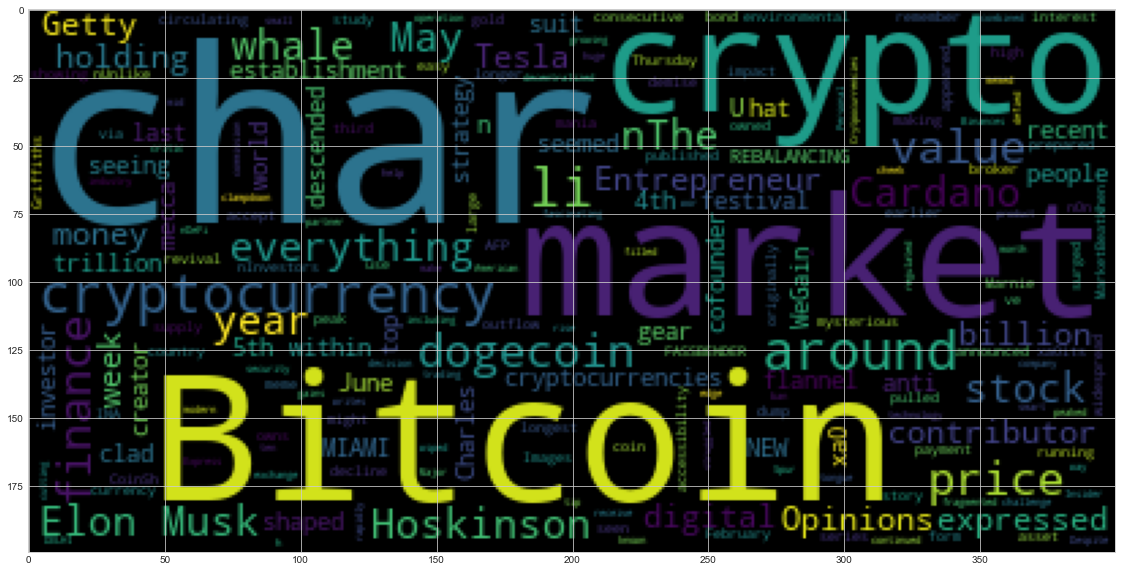

In [58]:
car_cloud = " ".join(car_words)
wc = WordCloud().generate(car_cloud)
plt.imshow(wc)

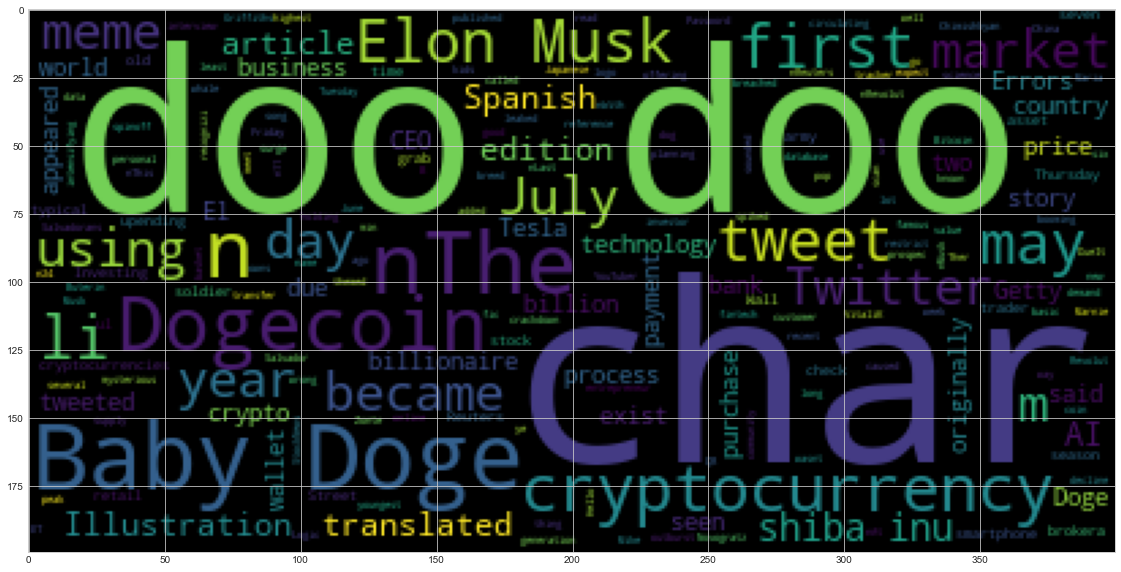

In [59]:
link_cloud = " ".join(link_words)
wc = WordCloud().generate(link_cloud)
plt.imshow(wc)

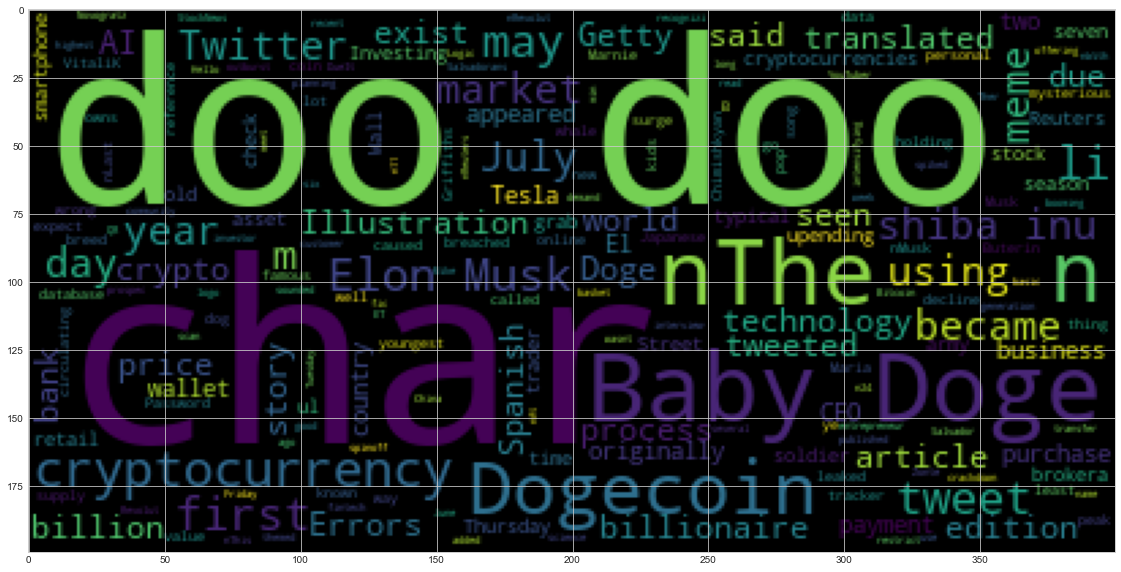

In [60]:
pol_cloud = " ".join(pol_words)
wc = WordCloud().generate(pol_cloud)
plt.imshow(wc)

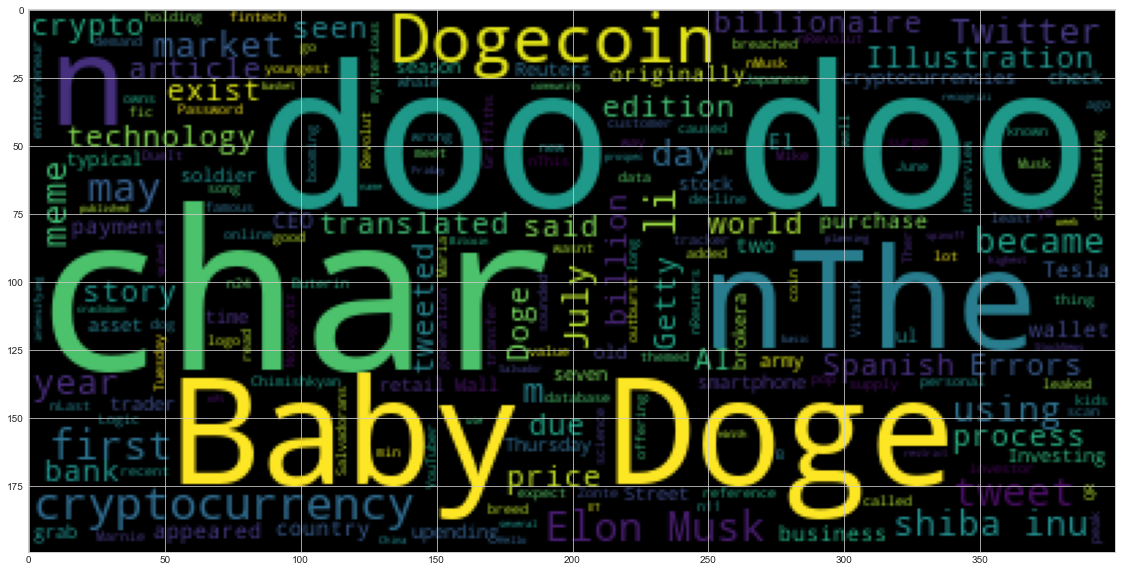

In [61]:
doge_cloud = " ".join(doge_words)
wc = WordCloud().generate(doge_cloud)
plt.imshow(wc)